# Analyzing eCommerce Business Performance

By : Anan Agrani

In [1]:
# importing data wrangling libraries
import pandas as pd
import numpy as np

In [2]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
from matplotlib import rcParams
from scipy import stats
import matplotlib.style as style

#visualisation settings
rcParams['figure.figsize'] = 20, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Standard plotly imports
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) #show all column

## Annual Customer Activity Growth Analysis

### Average Monthly Active User (MAU) Every Year

#### Import Dataset

In [4]:
df_sumber_orders = pd.read_csv ('orders_dataset.csv') #import dataset
df_sumber_orders.sample(2) #show random rows in dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
90316,ed1acc924e85e293849485a9d5dc3498,64b4f796f321357d2ce61f511da7f73a,unavailable,2017-05-15 10:54:23,2017-05-17 03:45:23,NaN,NaN,2017-06-02 00:00:00
47142,f1c646195f427172a9936a8d0e18da06,f92612f68ce1fb8a3b2fad4cb553822b,delivered,2017-06-16 00:14:46,2017-06-16 00:25:45,2017-06-19 16:10:54,2017-06-27 14:18:55,2017-07-12 00:00:00


In [5]:
df_orders = df_sumber_orders #did this in order to keep the source dataset's authenticity

In [6]:
df_orders[['order_year', 'order_month','order_day']] = df_orders['order_purchase_timestamp'].str.split('-', 3, expand=True) #split into year and month
df_orders = df_orders.drop(columns=['order_day']) #day dropped bcs we didn't need it
df_orders.sample(2) #show random rows in dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_year,order_month
55680,09a83ffe176e7f00f3b93584ee9fb07c,dd7ac74cff12b8539e9c6d3e641d4542,delivered,2018-04-03 17:07:28,2018-04-03 17:28:54,2018-04-04 20:34:57,2018-04-17 03:03:41,2018-04-25 00:00:00,2018,04
10013,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04 00:00:00,2017,07


#### Groupping

In [7]:
dfg_mau_orders = df_orders.groupby(['order_year','order_month']).agg({'customer_id': ['nunique']}).reset_index() #groupping by year and month, count the distinct of customer_id columns
dfg_mau_orders.columns = ['order_year','order_month','total_customer'] #change the columns name
dfg_mau_orders #see the result of groupping table

,order_year,order_month,total_customer
0,2016,09,4
1,2016,10,324
2,2016,12,1
3,2017,01,800
4,2017,02,1780
5,2017,03,2682
6,2017,04,2404
7,2017,05,3700
8,2017,06,3245
9,2017,07,4026


In [8]:
dfg_mau_orders = dfg_mau_orders.groupby(['order_year']).agg({'total_customer': ['mean']}).reset_index() #groupping by year and count the average of total_customer columns
dfg_mau_orders.columns = ['order_year','avg_mau'] #change the columns name
dfg_mau_orders = round(dfg_mau_orders) #round the avg_mau
dfg_mau_orders

,order_year,avg_mau
0,2016,110.0
1,2017,3758.0
2,2018,5401.0


#### Graphic

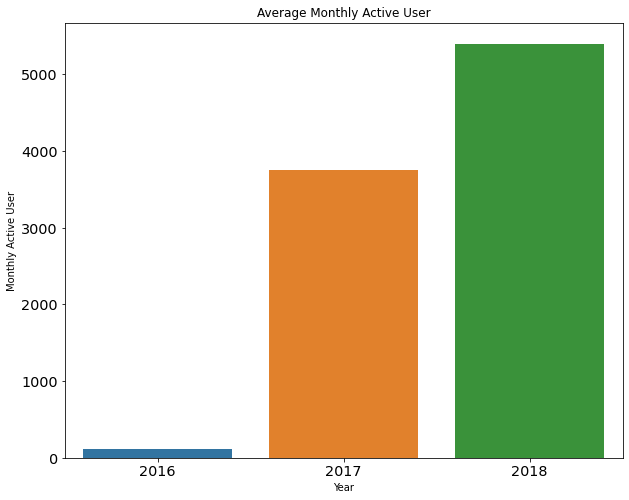

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(data=dfg_mau_orders, x='order_year', y='avg_mau')
plt.xticks()
plt.title("Average Monthly Active User", fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Monthly Active User', fontsize=10)
plt.show()

Every year, the number of Monthly Active Users (MAU) in this ecommerce grows

### Total New Customer Every Year

#### Import Dataset

In [10]:
df_sumber_orders = pd.read_csv ('orders_dataset.csv') #import dataset
df_sumber_orders.sample(2) #show random rows in dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
94311,87e1feb622e373e4f0d2cceb1f610886,59c202534c0e0e5088cdd5fc3b27e728,delivered,2017-03-16 15:07:42,2017-03-16 15:07:42,2017-03-22 09:06:11,2017-03-27 13:06:46,2017-04-04 00:00:00
3199,0b0334d5ad01e008caafb19973bf1acb,64c1209f6fae0cbe57bd7e39469506f4,delivered,2018-04-25 10:52:10,2018-04-25 11:09:03,2018-05-02 11:19:00,2018-05-07 20:12:24,2018-06-05 00:00:00


In [11]:
df_sumber_customers = pd.read_csv ('customers_dataset.csv') #import dataset
df_sumber_customers.sample(2) #show random rows in dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
23162,9a91fb951e7fd3f4adf713cff82acf3d,75129ee941b3624b131f8dcadf3f4d56,6843,embu das artes,SP
29141,eb7d32b871d7e1d8f3dcce1aa4e095bd,cbdcaa621583ca59fb72b5cb1866c34f,4191,sao paulo,SP


In [12]:
df_orders = df_sumber_orders #did this in order to keep the source dataset's authenticity
df_customers = df_sumber_customers #did this in order to keep the source dataset's authenticity

#### Merge/Join Dataset

In [13]:
dfm = df_orders.merge(df_customers, left_on='customer_id',right_on='customer_id', how='inner') #merge the datasets with inner method
dfm.head(5) #show the first 5 rows in dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [14]:
dfm[['order_year', 'order_month','order_day']] = dfm['order_purchase_timestamp'].str.split('-', 3, expand=True) #split into year and month
dfm = dfm.drop(columns=['order_day']) #day dropped bcs we didn't need it
dfm.sample(2) #show random rows in dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_year,order_month
61077,3f7adef1231a477e6ff24caefa8afd63,6647c7485d0a91fe4b176db1016d999e,delivered,2017-12-10 22:05:44,2017-12-10 23:08:49,2017-12-12 21:18:56,2017-12-15 16:33:00,2017-12-28 00:00:00,3de8d57dc110ecf3f7c2478627819138,27210,volta redonda,RJ,2017,12
97687,fbdc60f79bd8d24e2c9187d3404440e3,0f93c9c01fbffa1c04f19e99c42823c2,delivered,2018-06-08 12:11:19,2018-06-08 12:36:37,2018-06-08 14:40:00,2018-06-27 17:12:12,2018-07-13 00:00:00,76ee29ba962deaf4c84c357d0dae8a9f,26570,mesquita,RJ,2018,06


#### Groupping

In [15]:
dfmg_newcust = dfm.groupby(['order_year']).agg({'customer_unique_id': ['nunique']}).reset_index() #groupping by year and month, count the distinct of customer_id columns
dfmg_newcust.columns = ['order_year','total_customer'] #change the columns name
dfmg_newcust #see the result of groupping table

,order_year,total_customer
0,2016,326
1,2017,43713
2,2018,52749


#### Graphic

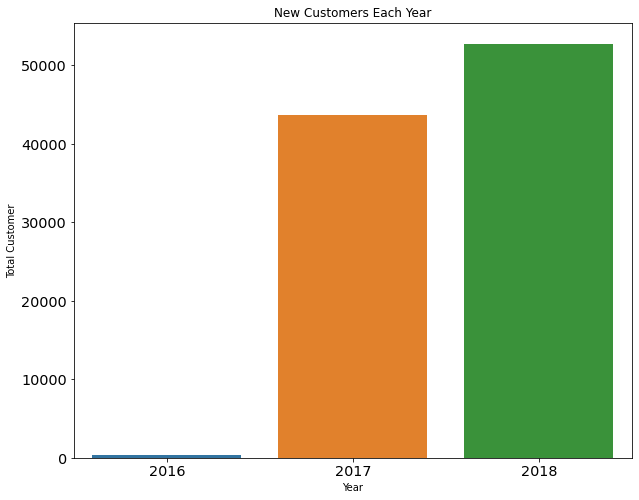

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(data=dfmg_newcust, x='order_year', y='total_customer')
plt.xticks()
plt.title("New Customers Each Year", fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Customer', fontsize=10)
plt.show()

Every year, the number of New Customers in this ecommerce grows

### The Number of Customers Who Make Repeat Orders Each Year

#### Import Dataset

In [17]:
df_sumber_orders = pd.read_csv ('orders_dataset.csv') #import dataset
df_sumber_customers = pd.read_csv ('customers_dataset.csv') #import dataset

In [18]:
df_orders = df_sumber_orders #did this in order to keep the source dataset's authenticity
df_customers = df_sumber_customers #did this in order to keep the source dataset's authenticity

#### Merge/Join Dataset

In [19]:
dfm = df_orders.merge(df_customers, left_on='customer_id',right_on='customer_id', how='inner') #merge the datasets with inner method
dfm.head(5) #show the first 5 rows in dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [20]:
dfm[['order_year', 'order_month','order_day']] = dfm['order_purchase_timestamp'].str.split('-', 3, expand=True)  #split into year and month
dfm = dfm.drop(columns=['order_day']) #day dropped bcs we didn't need it
dfm.sample(2) #show random rows in dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_year,order_month
97302,2db1b946263ea358e693eb2aea38f157,f540606dad1c114a358d71d505c50e00,delivered,2017-05-18 12:32:21,2017-05-18 13:10:12,2017-05-19 15:17:00,2017-05-31 08:33:42,2017-06-22 00:00:00,a89b2a5f208aa3601c5aefd1eacc3c45,65603,caxias,MA,2017,05
14868,8dde8a7517f12da7ac022d2feac7db9a,0c494e7b47af78f1d766a4f5548f0c08,delivered,2017-10-05 07:35:06,2017-10-05 07:49:18,2017-10-06 12:57:46,2017-10-14 15:18:57,2017-10-31 00:00:00,49f8ff167da44aef10c1aff88b5c1f21,3185,sao paulo,SP,2017,10


#### Groupping

In [21]:
dfmg_repeat = dfm.groupby(['order_year','customer_unique_id']).agg({'order_purchase_timestamp': ['count']}).reset_index() #groupping by year and customer_unique_id, count the distinct of order_purchase_timestamp columns
dfmg_repeat.columns = ['order_year','cust_id','total_order'] #change the columns name
dfmg_repeat = dfmg_repeat[dfmg_repeat['total_order']>1] #filter customers with a total order of more than one

dfmg_repeat = dfmg_repeat.groupby(['order_year']).agg({'cust_id' : ['count']}).reset_index() #groupping again to find the total customer who repeats order
dfmg_repeat.columns = ['order_year','total_customer'] #change the columns name
dfmg_repeat #see the result of groupping table

,order_year,total_customer
0,2016,3
1,2017,1256
2,2018,1167


#### Graphic

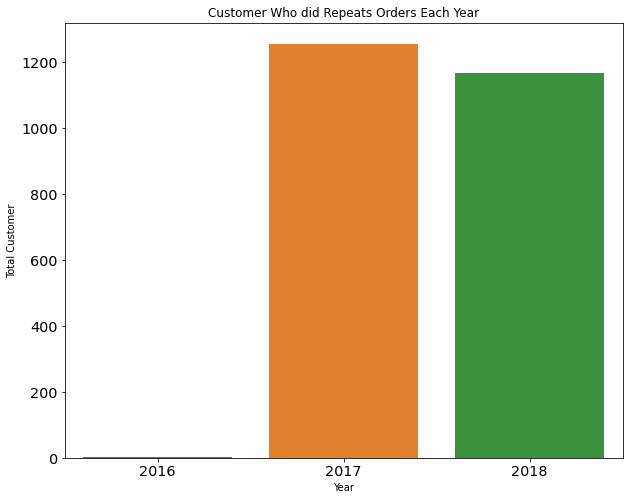

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(data=dfmg_repeat, x='order_year', y='total_customer')
plt.xticks()
plt.title("Customer Who did Repeats Orders Each Year", fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Customer', fontsize=10)
plt.show()

Our ecommerce had the most repeat customers in 2017.

### Average Order Frequency for Each Year

#### Import Dataset

In [23]:
df_sumber_orders = pd.read_csv ('orders_dataset.csv') #import dataset
df_sumber_customers = pd.read_csv ('customers_dataset.csv') #import dataset

In [24]:
df_orders = df_sumber_orders #did this in order to keep the source dataset's authenticity
df_customers = df_sumber_customers #did this in order to keep the source dataset's authenticity

#### Merge/Join Dataset

In [25]:
dfm = df_orders.merge(df_customers, left_on='customer_id',right_on='customer_id', how='inner') #merge the datasets with inner method
dfm.head(5) #show the first 5 rows in dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [26]:
dfm[['order_year', 'order_month','order_day']] = dfm['order_purchase_timestamp'].str.split('-', 3, expand=True) #split into year and month
dfm = dfm.drop(columns=['order_day']) #day dropped bcs we didn't need it
dfm.sample(2) #show random rows in dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_year,order_month
46584,4d5454c529c7a8cb61818f0f24c0d115,076933dfa56c84230b2965c7cab486e1,delivered,2017-08-09 22:32:28,2017-08-09 22:45:17,2017-08-10 18:47:42,2017-08-12 10:13:58,2017-08-24 00:00:00,ee0fe6783108a6ea35f38c70b6cf08b2,3731,sao paulo,SP,2017,08
98478,fbff77db5421bb7e1da292db45d07e75,7795e3faa6e16fc40aafee568b25a85d,delivered,2017-03-15 11:41:46,2017-03-15 11:41:46,2017-03-16 04:19:03,2017-03-20 10:34:54,2017-04-03 00:00:00,6ee4fdb7edab032aaa8392bab5446546,9060,santo andre,SP,2017,03


#### Groupping

In [27]:
dfmg_freq = dfm.groupby(['order_year','customer_unique_id']).agg({'order_purchase_timestamp': ['count']}).reset_index()  #groupping by year and customer_unique_id, count the distinct of order_purchase_timestamp columns
dfmg_freq.columns = ['order_year','cust_id','total_order'] #change the columns name

dfmg_freq = dfmg_freq.groupby(['order_year']).agg({'total_order' : ['mean']}).reset_index() #groupping again to find the average of order's frequency 
dfmg_freq.columns = ['order_year','frequency_order'] #change the columns name
dfmg_freq #see the result of groupping table

,order_year,frequency_order
0,2016,1.009202
1,2017,1.031753
2,2018,1.023925


#### Graphic

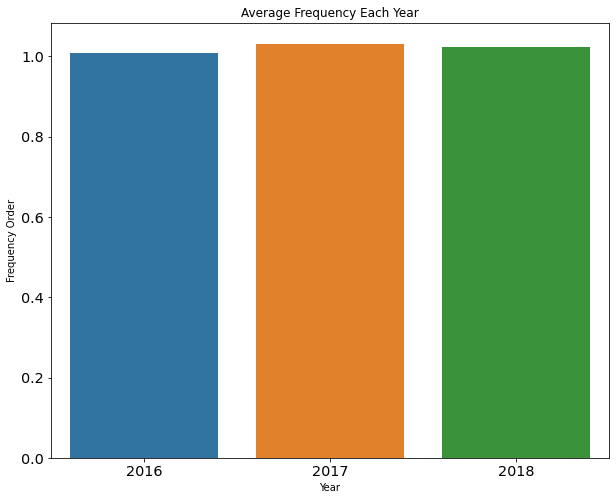

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(data=dfmg_freq, x='order_year', y='frequency_order')
plt.xticks()
plt.title("Average Frequency Each Year", fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Frequency Order', fontsize=10)
plt.show()

The year with the highest order frequency was 2017

### Analysis/Insight

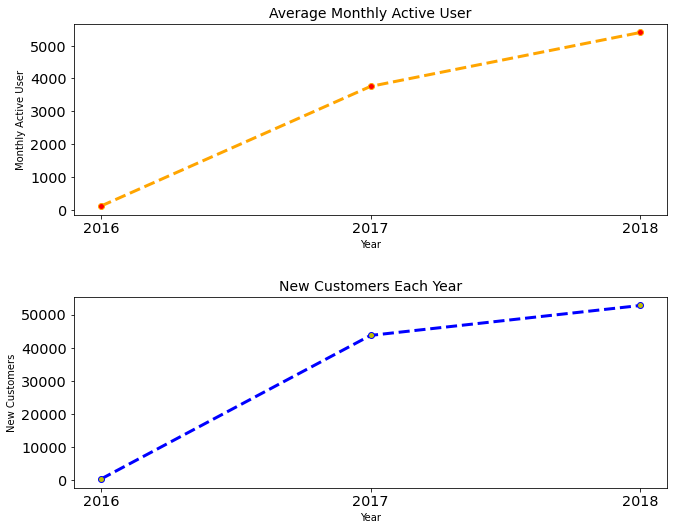

In [29]:
fig, ax = plt.subplots(2,1,figsize=(10,8)) #2 rows 1 column

#plot
ax[0].plot(dfg_mau_orders['order_year'], dfg_mau_orders['avg_mau'], color = 'orange', linestyle='--', marker='o', markerfacecolor='r')
ax[1].plot(dfmg_newcust['order_year'], dfmg_newcust['total_customer'], color = 'blue', linestyle='--', marker='o', markerfacecolor='y')

#title on each plot
ax[0].set_title('Average Monthly Active User', fontsize = 14)
ax[1].set_title('New Customers Each Year', fontsize = 14)

#legend on each plot
ax[0].set_xlabel('Year', fontsize=10)
ax[1].set_xlabel('Year', fontsize=10)
ax[0].set_ylabel('Monthly Active User', fontsize=10)
ax[1].set_ylabel('New Customers', fontsize=10)

#distance between plots
fig.tight_layout(pad=3.0)

The data in this dataset begins in September 2016, resulting in a value imbalance when compared to 2017 and 2018. The graph below shows that the average MAU and the number of new customers have increased year after year.

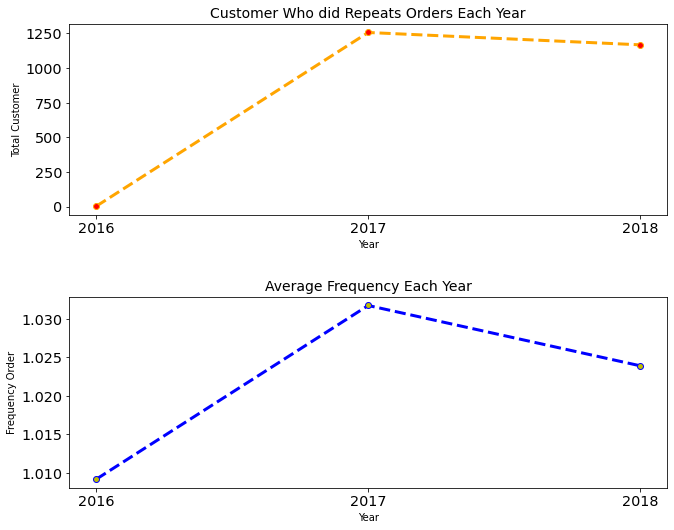

In [30]:
fig, ax = plt.subplots(2,1,figsize=(10,8)) #2 rows 1 column

#plot
ax[0].plot(dfmg_repeat['order_year'], dfmg_repeat['total_customer'], color = 'orange', linestyle='--', marker='o', markerfacecolor='r')
ax[1].plot(dfmg_freq['order_year'], dfmg_freq['frequency_order'], color = 'blue', linestyle='--', marker='o', markerfacecolor='y')

#title on each plot
ax[0].set_title('Customer Who did Repeats Orders Each Year', fontsize = 14)
ax[1].set_title('Average Frequency Each Year', fontsize = 14)

#legend on each plot
ax[0].set_xlabel('Year', fontsize=10)
ax[1].set_xlabel('Year', fontsize=10)
ax[0].set_ylabel('Total Customer', fontsize=10)
ax[1].set_ylabel('Frequency Order', fontsize=10)

#distance between plots
fig.tight_layout(pad=3.0)

Even though the average MAU and the number of new customers are increasing, the number of orders placed by customers does not appear to be improving. As can be seen, the average customer only orders once per year. In fact, the number of customers who placed repeat orders slightly decreased between 2017 and 2018.

## Annual Product Category Quality Analysis

### Revenue Each Year

#### Import Dataset

In [31]:
df_sumber_order_items = pd.read_csv ('order_items_dataset.csv') #import dataset
df_sumber_orders = pd.read_csv ('orders_dataset.csv') #import dataset

In [32]:
df_orders_items = df_sumber_order_items #did this in order to keep the source dataset's authenticity
df_orders = df_sumber_orders #did this in order to keep the source dataset's authenticity

In [33]:
df_orders_items['revenue'] = df_orders_items['price'] + df_orders_items['freight_value'] #make new column (revenue) by adding price and freight value
df_orders_items.sample(2) #show random rows

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue
77180,afbe0c76e58378669c3924e11182b02c,1,7be620cd314ce6460033ba9017be7a7f,7aa4334be125fcdd2ba64b3180029f14,2017-12-13 22:16:34,41.8,13.37,55.17
17850,28ec57c2ba11d394a43df3a4846055b6,1,31a2f42a87890f87d77daebdfabc182e,4c03b9dd4c11ee2cb35c96c49efc9420,2017-07-12 16:55:23,149.0,18.29,167.29


#### Merge/Join Dataset

In [34]:
dfm = df_orders_items.merge(df_orders, left_on='order_id',right_on='order_id', how='inner') #merge the datasets with inner method
dfm.head(5) #show the first 5 rows in dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [35]:
dfm[['order_year', 'order_month','order_day']] = dfm['order_purchase_timestamp'].str.split('-', 3, expand=True) #split into year and month
dfm = dfm.drop(columns=['order_day']) #day dropped bcs we didn't need it
dfm.sample(2) #show random rows

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_year,order_month
33829,4c964566a7cde1bb097b36c556acc0eb,1,8db26005b17d1f7e2e8b3ab829051790,00fc707aaaad2d31347cf883cd2dfe10,2018-02-21 11:35:45,77.0,12.67,89.67,b3892e93d6c7734619f01ecdb6e2990f,delivered,2018-02-10 12:27:06,2018-02-10 12:35:45,2018-02-15 15:45:57,2018-03-01 15:22:38,2018-03-08 00:00:00,2018,02
12779,1cf7badecfe67aca1d27e5fbaedf2c64,1,37eab73447adec63c01f2cebf76afd9e,e9779976487b77c6d4ac45f75ec7afe9,2018-05-03 14:11:57,21.0,8.82,29.82,7ea1617d2d2b80eab136466f21021175,delivered,2018-04-26 13:46:58,2018-04-26 14:11:57,2018-04-27 14:26:00,2018-04-28 16:56:34,2018-05-10 00:00:00,2018,04


#### Groupping

In [36]:
dfmg_revenue = dfm.groupby(['order_year','order_status']).agg({'revenue': ['sum']}).reset_index() #groupping by year and order_status, count the total of revenue
dfmg_revenue.columns = ['order_year','order_status','total_revenue'] #change the columns name
dfmg_revenue = dfmg_revenue[dfmg_revenue['order_status']=='delivered'] #filter orders with oder_status 'delivered'
dfmg_revenue #see the result of groupping table

,order_year,order_status,total_revenue
1,2016,delivered,46653.74
8,2017,delivered,6921535.24
13,2018,delivered,8451584.77


#### Graphic

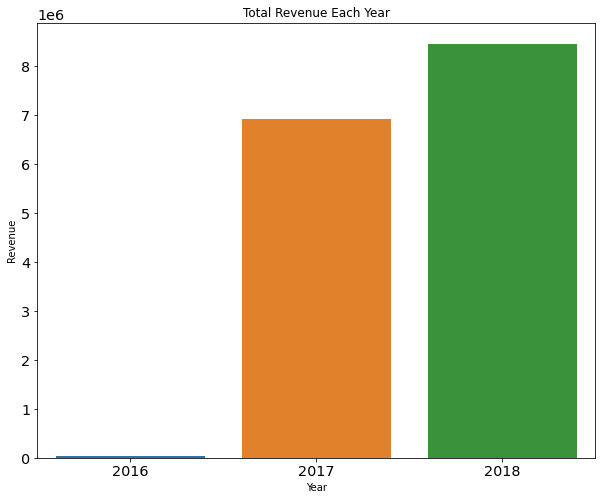

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(data=dfmg_revenue, x='order_year', y='total_revenue')
plt.xticks()
plt.title("Total Revenue Each Year", fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Revenue', fontsize=10)
plt.show()

Every year, our ecommerce's revenue grows.

### Total of Canceled Orders Each Year

#### Import Dataset

In [38]:
df_sumber_orders = pd.read_csv ('orders_dataset.csv') #import dataset
df_orders = df_sumber_orders #did this in order to keep the source dataset's authenticity

In [39]:
df_orders[['order_year', 'order_month','order_day']] = df_orders['order_purchase_timestamp'].str.split('-', 3, expand=True) #split into year and month
df_orders = df_orders.drop(columns=['order_day']) #day dropped bcs we didn't need it
df_orders.sample(2) #show random rows

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_year,order_month
1252,a9016dde97a6a447890dd748aa844b85,75ff064e942910b72e1ab6ddfabdda46,delivered,2018-04-25 16:06:04,2018-04-25 16:53:42,2018-04-26 12:51:00,2018-04-30 13:27:36,2018-05-16 00:00:00,2018,04
21094,a33539f882610ee1dc18289cc3087217,d8ad8f5acc7a63ee1e692f441defc86f,delivered,2018-06-01 22:41:07,2018-06-01 22:55:11,2018-06-05 12:41:00,2018-06-15 13:24:57,2018-07-12 00:00:00,2018,06


#### Groupping

In [40]:
dfg_cancel = df_orders.groupby(['order_year','order_status']).agg({'order_status': ['count']}).reset_index() #groupping by year and order_status, count the total of order
dfg_cancel.columns = ['order_year','order_status','total_cancel'] #change the columns name
dfg_cancel = dfg_cancel[dfg_cancel['order_status']=='canceled'] #filter orders with oder_status 'canceled'
dfg_cancel #see the result of groupping table

,order_year,order_status,total_cancel
0,2016,canceled,26
7,2017,canceled,265
14,2018,canceled,334


#### Graphic

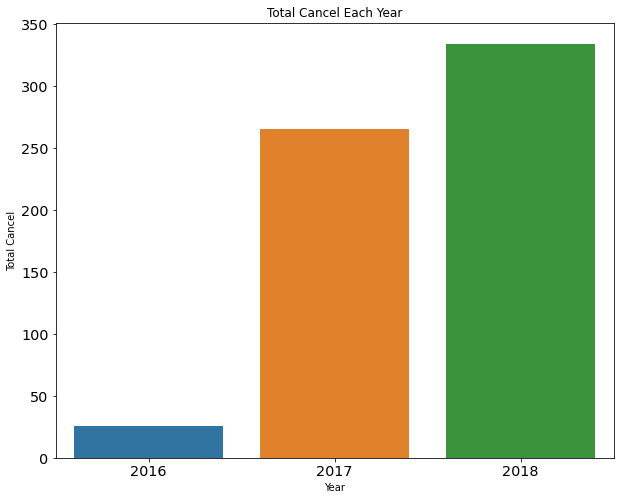

In [41]:
plt.figure(figsize=(10,8))
sns.barplot(data=dfg_cancel, x='order_year', y='total_cancel')
plt.xticks()
plt.title("Total Cancel Each Year", fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Cancel', fontsize=10)
plt.show()

Every year, the number of cancel order in this ecommerce grows

### Top Categories that Generate the Most Revenue Each Year

#### Import Dataset

In [42]:
df_sumber_order_items = pd.read_csv ('order_items_dataset.csv') #import dataset
df_sumber_orders = pd.read_csv ('orders_dataset.csv') #import dataset
df_sumber_product = pd.read_csv ('product_dataset.csv') #import dataset

In [43]:
df_orders_items = df_sumber_order_items #did this in order to keep the source dataset's authenticity
df_orders = df_sumber_orders #did this in order to keep the source dataset's authenticity
df_product = df_sumber_product #did this in order to keep the source dataset's authenticity

In [44]:
df_product = df_product.drop(columns=['Unnamed: 0']) #drop column unnamed

In [45]:
df_orders_items['revenue'] = df_orders_items['price'] + df_orders_items['freight_value'] #make new column (revenue) by adding price and freight value
df_orders_items.sample(2) #show random rows

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue
106444,f1e63d984de289ace77245034ae6cbdb,1,8640f0c0e2d0af93274cad7452f80034,01fdefa7697d26ad920e9e0346d4bd1b,2017-08-28 15:25:16,64.9,19.69,84.59
4139,0948bd714f9f0ca68d9e70af5090d3f6,1,8a27fbb311995ff454749a35fc0bd9a9,dc4a0fc896dc34b0d5bfec8438291c80,2017-05-29 01:30:21,59.9,11.92,71.82


#### Merge/Join Dataset

In [46]:
dfm = df_orders_items.merge(df_orders, left_on='order_id',right_on='order_id', how='inner') #merge the datasets with inner method
dfm.head(5) #show the first 5 rows in dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [47]:
dfm = dfm.merge(df_product, left_on='product_id',right_on='product_id', how='inner') #merge the datasets with inner method
dfm.head(5) #show the first 5 rows in dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,73.86,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,83.23,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,75.07,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,72.19,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [48]:
dfm[['order_year', 'order_month','order_day']] = dfm['order_purchase_timestamp'].str.split('-', 3, expand=True) #split into year and month
dfm = dfm.drop(columns=['order_day']) #day dropped bcs we didn't need it
dfm.sample(2) #show random rows

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_year,order_month
32570,d5211af24819d319c02a285e7bb51750,4,6f46359e56f51d5deded13adcd1c255c,516e7738bd8f735ac19a010ee5450d8d,2018-08-08 16:45:15,31.9,3.37,35.27,a6d8c2fa92836346256c28d885d9eea0,delivered,2018-08-03 16:29:05,2018-08-03 16:45:15,2018-08-06 13:27:00,2018-08-09 15:09:10,2018-09-05 00:00:00,health_beauty,42.0,437.0,1.0,650.0,16.0,16.0,16.0,2018,08
20949,02a96c679e6086ecd026c42a83136068,1,86b8032cbb666ec9ca1f2aa4d4cace06,dee656f0f566ed1aa85bd137c943f08f,2017-12-26 10:11:35,67.9,11.98,79.88,d911a2fb88a320f9a86188bd9c6bd47f,delivered,2017-12-19 09:55:01,2017-12-19 10:11:35,2017-12-19 21:58:29,2017-12-26 16:07:11,2018-01-12 00:00:00,sports_leisure,52.0,801.0,5.0,418.0,18.0,7.0,13.0,2017,12


#### Groupping

In [49]:
dfmg_top_category = dfm.groupby(['product_category_name','order_year','order_status']).agg({'revenue': ['sum']}).reset_index() #groupping by product_category_name, year and order_status, count the total of revenue
dfmg_top_category.columns = ['product_category_name','order_year','order_status','total_revenue'] #change the columns name
dfmg_top_category = dfmg_top_category[dfmg_top_category['order_status']=='delivered'] #filter orders with oder_status 'delivered'
dfmg_top_category #see the result of groupping table

,product_category_name,order_year,order_status,total_revenue
0,agro_industry_and_commerce,2017,delivered,31111.89
1,agro_industry_and_commerce,2018,delivered,45091.41
4,air_conditioning,2016,delivered,1503.61
7,air_conditioning,2017,delivered,29867.06
11,air_conditioning,2018,delivered,28483.88
...,...,...,...,...
480,toys,2017,delivered,345717.73
485,toys,2018,delivered,196751.80
489,watches_gifts,2016,delivered,2793.71
492,watches_gifts,2017,delivered,511800.97


In [50]:
dfmg_top_category['Row_Num'] = dfmg_top_category.groupby(['order_year'])['total_revenue'].rank(method='first',ascending=False) #make new column (row_num) to know the rank based on order_year and total_revenue
dfmg_top_category #see the result of groupping table

,product_category_name,order_year,order_status,total_revenue,Row_Num
0,agro_industry_and_commerce,2017,delivered,31111.89,27.0
1,agro_industry_and_commerce,2018,delivered,45091.41,30.0
4,air_conditioning,2016,delivered,1503.61,11.0
7,air_conditioning,2017,delivered,29867.06,29.0
11,air_conditioning,2018,delivered,28483.88,39.0
...,...,...,...,...,...
480,toys,2017,delivered,345717.73,8.0
485,toys,2018,delivered,196751.80,14.0
489,watches_gifts,2016,delivered,2793.71,6.0
492,watches_gifts,2017,delivered,511800.97,3.0


In [51]:
dfmg_top_category[dfmg_top_category['Row_Num']==1.0] #filter the product category name based on year by row number

,product_category_name,order_year,order_status,total_revenue,Row_Num
55,bed_bath_table,2017,delivered,580949.20,1.0
259,furniture_decor,2016,delivered,6899.35,1.0
303,health_beauty,2018,delivered,866810.34,1.0


Furniture decor (2016), bed and bath tables (2017), and health and beauty (2018) are the top three product categories by revenue

### Categories that Experience the Most Canceled Orders Each Year

#### Import Dataset

In [52]:
df_sumber_order_items = pd.read_csv ('order_items_dataset.csv') #import dataset
df_sumber_orders = pd.read_csv ('orders_dataset.csv') #import dataset
df_sumber_product = pd.read_csv ('product_dataset.csv') #import dataset

In [53]:
df_orders_items = df_sumber_order_items #did this in order to keep the source dataset's authenticity
df_orders = df_sumber_orders #did this in order to keep the source dataset's authenticity
df_product = df_sumber_product #did this in order to keep the source dataset's authenticity

In [54]:
df_product = df_product.drop(columns=['Unnamed: 0']) #drop column unnamed

#### Merge/Join Dataset

In [55]:
dfm = df_orders_items.merge(df_orders, left_on='order_id',right_on='order_id', how='inner') #merge the datasets with inner method
dfm.head(5) #show the first 5 rows in dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [56]:
dfm = dfm.merge(df_product, left_on='product_id',right_on='product_id', how='inner') #merge the datasets with inner method
dfm.head(5) #show the first 5 rows in dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [57]:
dfm[['order_year', 'order_month','order_day']] = dfm['order_purchase_timestamp'].str.split('-', 3, expand=True) #split into year and month
dfm = dfm.drop(columns=['order_day']) #day dropped bcs we didn't need it
dfm.sample(2) #show random rows

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_year,order_month
41369,df2daf96320942e1449ef115ee1b5624,1,5c77339ada5044e33450d5c2660692e0,4c2b230173bb36f9b240f2b8ac11786e,2018-08-22 04:10:25,49.90,13.01,5ed66a1a89c68472506fa6a66785463b,delivered,2018-08-12 15:22:47,2018-08-14 04:10:25,2018-08-21 08:29:00,2018-08-24 19:59:03,2018-08-31 00:00:00,sports_leisure,33.0,2146.0,1.0,150.0,16.0,16.0,11.0,2018,08
88759,59fa9c0df154e7b3b8bb9eb70cd4ec86,1,b8fdfcbb0ed03c62d197327a56593842,c24173065483e421f9e5e7f599de101d,2017-07-25 03:45:33,69.99,7.78,129247e08b7e3927f62abb0b6848a2ba,delivered,2017-07-18 12:38:09,2017-07-19 03:45:33,2017-07-20 21:51:52,2017-07-22 15:51:22,2017-07-31 00:00:00,sports_leisure,42.0,852.0,2.0,1400.0,16.0,12.0,11.0,2017,07


#### Groupping

In [58]:
dfmg_top_cancel = dfm.groupby(['product_category_name','order_year','order_status']).agg({'order_status': ['count']}).reset_index() #groupping by product_category_name, year and order_status, count the total of revenue
dfmg_top_cancel.columns = ['product_category_name','order_year','order_status','total_canceled'] #change the columns name
dfmg_top_cancel = dfmg_top_cancel[dfmg_top_cancel['order_status']=='canceled'] #filter orders with oder_status 'canceled'
dfmg_top_cancel #see the result of groupping table

,product_category_name,order_year,order_status,total_canceled
6,air_conditioning,2017,canceled,1
10,air_conditioning,2018,canceled,1
16,art,2018,canceled,1
22,audio,2017,canceled,1
26,auto,2016,canceled,2
...,...,...,...,...
477,toys,2016,canceled,3
479,toys,2017,canceled,15
484,toys,2018,canceled,16
491,watches_gifts,2017,canceled,13


In [59]:
dfmg_top_cancel['Row_Num'] = dfmg_top_cancel.groupby(['order_year'])['total_canceled'].rank(method='first',ascending=False) #make new column (row_num) to know the rank based on order_year and total_canceled
dfmg_top_cancel #see the result of groupping table

,product_category_name,order_year,order_status,total_canceled,Row_Num
6,air_conditioning,2017,canceled,1,25.0
10,air_conditioning,2018,canceled,1,29.0
16,art,2018,canceled,1,30.0
22,audio,2017,canceled,1,26.0
26,auto,2016,canceled,2,2.0
...,...,...,...,...,...
477,toys,2016,canceled,3,1.0
479,toys,2017,canceled,15,6.0
484,toys,2018,canceled,16,6.0
491,watches_gifts,2017,canceled,13,8.0


In [60]:
dfmg_top_cancel[dfmg_top_cancel['Row_Num']==1.0] #filter the product category name based on year by row number

,product_category_name,order_year,order_status,total_canceled,Row_Num
302,health_beauty,2018,canceled,27,1.0
442,sports_leisure,2017,canceled,25,1.0
477,toys,2016,canceled,3,1.0


Toys (2016), Sports Leisure (2017), and health and beauty (2018) are the top three product categories by total canceled

### Analysis/Insight

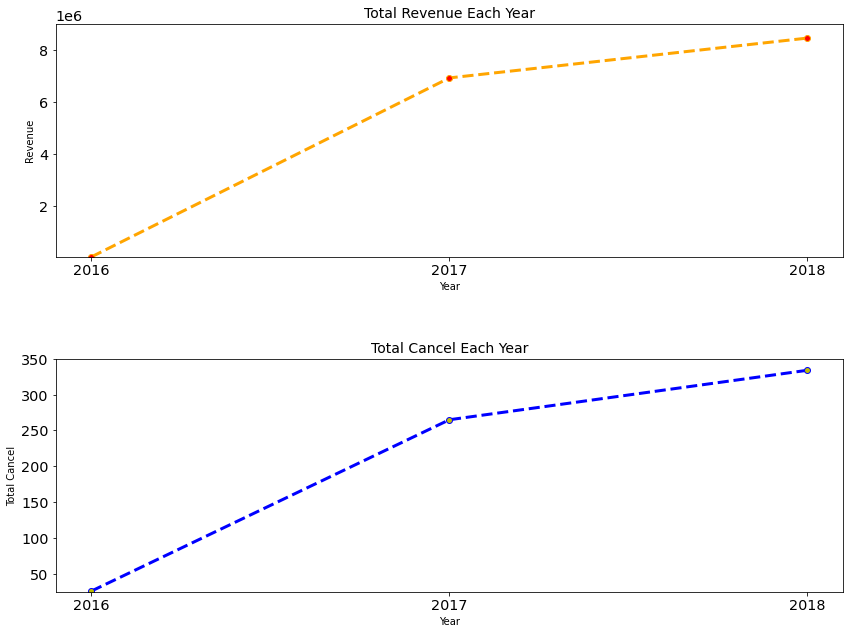

In [61]:
fig, ax = plt.subplots(2,1,figsize=(13,10)) #2 rows 1 column

#plot
ax[0].plot(dfmg_revenue['order_year'], dfmg_revenue['total_revenue'], color = 'orange', linestyle='--', marker='o', markerfacecolor='r')
ax[1].plot(dfg_cancel['order_year'], dfg_cancel['total_cancel'], color = 'blue', linestyle='--', marker='o', markerfacecolor='y')

#title on each plot
ax[0].set_title('Total Revenue Each Year', fontsize = 14)
ax[1].set_title('Total Cancel Each Year', fontsize = 14)

#legend on each plot
ax[0].set_xlabel('Year', fontsize=10)
ax[1].set_xlabel('Year', fontsize=10)
ax[0].set_ylabel('Revenue', fontsize=10)
ax[1].set_ylabel('Total Cancel', fontsize=10)

#x-y limit each plot
ax[0].set_ylim(50000, 9000000)
ax[1].set_ylim(25,350)

#distance between plots
fig.tight_layout(pad=5.0)

The graph below shows that total revenue earned each year has increased, but canceled orders made by customers have also increased.

## Analysis of Annual Payment Type Usage

### Total Usage of Each Type of Payment for Each Year

#### Import Dataset

In [62]:
df_sumber_orders = pd.read_csv ('orders_dataset.csv') #import dataset
df_sumber_payment = pd.read_csv ('order_payments_dataset.csv') #import dataset

In [63]:
df_orders_items = df_sumber_orders #did this in order to keep the source dataset's authenticity
df_payment = df_sumber_payment #did this in order to keep the source dataset's authenticity

#### Merge/Join Dataset

In [64]:
dfm = df_orders_items.merge(df_payment, left_on='order_id',right_on='order_id', how='inner') #merge the datasets with inner method
dfm.head(5) #show the first 5 rows in dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [65]:
dfm[['order_year', 'order_month','order_day']] = dfm['order_purchase_timestamp'].str.split('-', 3, expand=True) #split into year and month
dfm = dfm.drop(columns=['order_day']) #day dropped bcs we didn't need it
dfm.sample(2) #show random rows

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_year,order_month
63522,70e2326f6a9a2355015239e7c9243524,92e3884d3ddba44337458d280298fbb7,delivered,2018-03-08 10:15:53,2018-03-08 10:30:34,2018-03-10 01:22:22,2018-03-21 00:38:52,2018-04-02 00:00:00,1,credit_card,1,33.23,2018,03
19253,54ca11fe8af494d4cbb2cc7220f0a132,2c4f8a56ddfef3b48ea8d9b2bf5a8ffa,delivered,2017-12-11 13:47:29,2017-12-13 02:34:22,2017-12-13 14:59:21,2017-12-21 18:49:52,2018-01-11 00:00:00,1,boleto,1,232.10,2017,12


#### Groupping

In [66]:
dfmg_payment = dfm.groupby(['payment_type','order_year']).agg({'customer_id': ['nunique']}).reset_index() #groupping by order_year and payment_type, count the distinct of customer_id columns
dfmg_payment.columns = ['payment_type','order_year','total_customer'] #change the columns name
dfmg_payment #see the result of groupping table

,payment_type,order_year,total_customer
0,boleto,2016,63
1,boleto,2017,9508
2,boleto,2018,10213
3,credit_card,2016,257
4,credit_card,2017,34415
5,credit_card,2018,41833
6,debit_card,2016,2
7,debit_card,2017,422
8,debit_card,2018,1104
9,not_defined,2018,3


In [67]:
dfmg_payment_pivot = pd.pivot_table(dfmg_payment,
                                    index = ['payment_type'],
                                    columns = ['order_year'],
                                    values = ['total_customer']
                                    )
dfmg_payment_pivot #see the result of groupping table

total_customer                  
order_year             2016     2017     2018
payment_type                                 
boleto                 63.0   9508.0  10213.0
credit_card           257.0  34415.0  41833.0
debit_card              2.0    422.0   1104.0
not_defined             NaN      NaN      3.0
voucher                11.0   1925.0   1930.0

#### Graphic

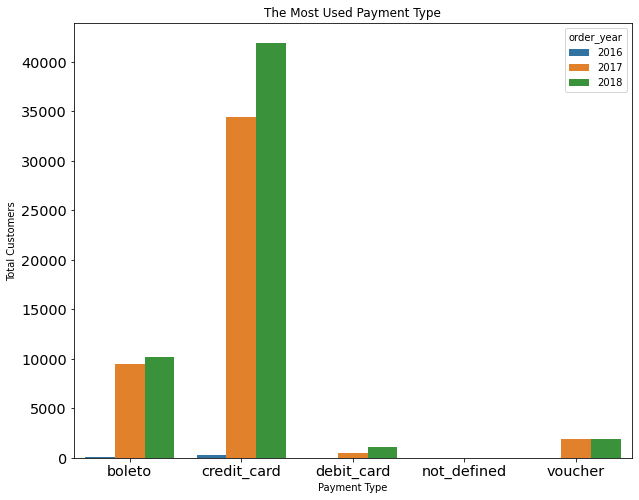

In [68]:
plt.figure(figsize=(10,8))
sns.barplot(data=dfmg_payment, x='payment_type', y='total_customer',hue='order_year')
plt.xticks()
plt.title("The Most Used Payment Type", fontsize=12)
plt.xlabel('Payment Type', fontsize=10)
plt.ylabel('Total Customers', fontsize=10)
plt.show()

The most used payment methods in our ecommerce are credit card and boleto.

### Analysis/Insight

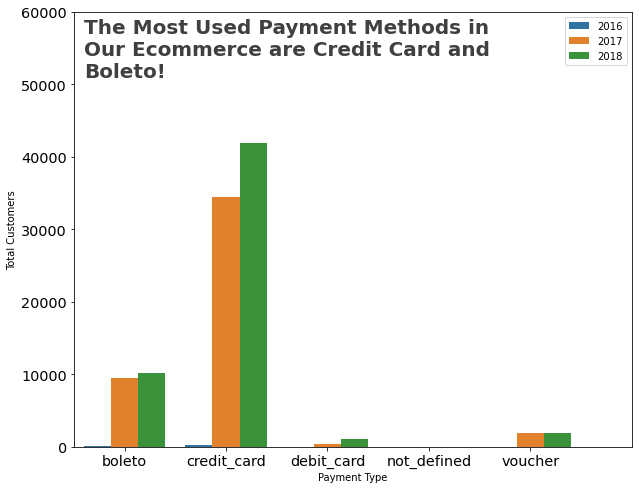

In [69]:
#plot
plt.figure(figsize=(10,8))
plot2 =  sns.barplot(data=dfmg_payment, x='payment_type', y='total_customer',hue='order_year')

#legend on plot
plt.xlabel('Payment Type', fontsize = 10)
plt.ylabel('Total Customers', fontsize = 10)
plot2.legend(loc=1)

#x-y limit on plot
plt.ylim(0,60000)
plt.xlim(-0.5,5)

#title on plot
plot2.annotate(xy=(-0.5,51000), xytext=(-0.5+0.1,51000+1), text = "The Most Used Payment Methods in \nOur Ecommerce are Credit Card and \nBoleto!",
              fontsize = 20, weight = 'bold', alpha = .75)

plt.show()

Over the years credit card and boleto are the most commonly used payment methods in our ecommerce